Homework 2: Backpropagation
==========

> **Submission Instructions:** Before the deadline, export the completed notebook to PDF and upload it to GradeScope. The PDF should clearly show your code, and the result of running the code. Check the PDF to ensure that it is readable, the font-size is not small, and no information is cut-off. There will be no make-ups or extensions for corrupted/damaged/unreadable PDFs.

**Names of Collaborators**: Tianqi Zhao

In this problem set, you will experiment with neural networks for image recognition. We will start with a toy neural network,
where you will build up the pieces to implement backpropagation.  Then, we will switch to industrial strength neural
networks that are already trained, and use them for image recognition.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython import display

Problem 1: Neural Network Layers
---------------------

We are going to implement a simple neural network that uses fully connected layers and the ReLU activation function. In this problem, we first implement the individual layers, then later on you will chain them together to create a neural network.

The ReLU layer should follow the implementation discussed in lecture. The fully connected layer is just a linear layer without a bias term. It is called a fully connected layer because every input "neuron" is connected to every output "neuron" through a weighted summation.

The input to the forward pass of each layer will always be an NxB matrix, where N is the number of dimensions for an input vector, and B is the number of vectors in the batch. Since neural networks need to perform gradient descent over many millions of iterations, we need to make each step very efficient. On most hardware, it is much faster to batch operations together. We will batch the forward pass to operate on B vectors of dimension N at once, and we will do a similar batching for the backwards pass too.

Implement the following methods:
- `forwards()` for ReLU 
- `backwards()` for ReLU
- `forwards()` for FullyConnectedLayer
- `backwards()` for FullyConnectedLayer
- `backwards_param()` for FullyConnectedLayer
- `update_param()` for FullyConnectedLayer

In [ ]:
class ReLU(object):
    def forwards(self, x):
        # TODO: Return the result for the forward function of ReLU.  
        # ans = np.zeros(x.shape)
        # for i in range(x.shape[0]):
        #   for j in range(x.shape[1]):
        #     ans[i,j] = max(x[i,j], 0)
        return np.maximum(0, x)
    
    def backwards(self, x, grad_output):
        assert(x.shape == grad_output.shape)
        grad = np.zeros(x.shape)
        # TODO: Return the gradient with respect to the input.
        grad[x>0] = 1
        return grad * grad_output 
    
    def backwards_param(self, x, grad_output):
        return None # We return none because there are no learnable parameters.
    
class FullyConnectedLayer(object):
    def __init__(self, in_dim, out_dim):
        self.out_dim = out_dim # During forward pass, the resulting output vector will have out_dim dimensions
        self.in_dim = in_dim # During forward pass, each input vector will have in_dim dimensions

        # Create an initial guess for the parameters w by sampling from a Gaussian
        # distribution.
        self.w = np.random.normal(0, math.sqrt(2 / (in_dim + out_dim)), [out_dim, in_dim])
    
    def forwards(self, x):
        # Computes the forward pass of a linear layer (which is also called 
        # fully connected). The input x will be a matrix that has the shape:
        # (in_dim)x(batch_size). The output should be a matrix that has the
        # shape (out_dim)x(batch_size). Note: in this implementation, there is
        # no bias term in order to keep it simple.
        assert(x.shape[0] == self.in_dim)
        # TODO: Return the result of the forwards pass. 
        ans = np.dot(self.w, x)
        # ans = np.matmul(x, self.w)
        return ans
    
    def backwards_param(self, x, grad_output):
        assert(grad_output.shape[0] == self.out_dim)
        # TODO: Return the gradient with respect to the parameters.
        # ans = np.zeros(self.w.shape)
        # for i in range(ans.shape[0]):
        #   ans[i] = x.T.sum(axis = 0)
        ans = np.dot(grad_output,x.T)
        return ans
    
    def backwards(self, x, grad_output):
        assert(grad_output.shape[0] == self.out_dim)
        # TODO: Return the gradient with respect to the input.
        # ans = np.zeros((x.shape[0], 1))
        # for i in range(ans.shape[0]):
        #   ans[i][0] = np.sum(self.w.T[i])
        ans = np.dot(self.w.T, grad_output)
        return ans
    
    def update_param(self, grad):
        # Given the gradient with respect to the parameters, perform a gradient step.
        # This function should modify self.w based on grad. You should implement 
        # the basic version of gradient descent. The function does not return anything.
        # TODO: Implement this function.
        self.w = self.w - grad

The below code can be useful to test the forward pass of these functions. Feel free to design your own test cases too!

In [ ]:
def test_equality(name, actual, expected):
    result = (np.abs(actual-expected) < 1e-7).all()
    if result:
        print("OK\t", name)
    else:
        print("FAIL\t", name)
        print("Actual:")
        print(actual)
        print("Expected:")
        print(expected)
        
test_input = np.array([[10., -5., 3., 0., 2., -1.]])
expected_output = np.array([[10., 0., 3., 0., 2., 0.]])
actual_output = ReLU().forwards(test_input)
test_equality("ReLU Forward 1", actual_output, expected_output)

test_input = np.array([[10., -5., 3., 0., 2., -1.], [3., 2., 1., 0., -1., -2.]])
expected_output = np.array([[10., 0., 3., 0., 2., 0.], [3., 2., 1., 0., 0., 0.]])
actual_output = ReLU().forwards(test_input)
test_equality("ReLU Forward Batch", actual_output, expected_output)

layer = FullyConnectedLayer(6,2)
layer.w[0, :] = 1
layer.w[1, :] = 0
test_input = np.array([[10, -5, 3, 0, 2, -1]]).T
expected_output = np.array([[test_input.sum(), 0]]).T
expected_output
actual_output = layer.forwards(test_input)
test_equality("Fully Connected Forward 1", actual_output, expected_output)

layer = FullyConnectedLayer(6,2)
layer.w[0, :] = -1
layer.w[1, :] = 2
test_input = np.array([[10, -5, 3, 0, 2, -1]]).T
expected_output = np.array([[-test_input.sum(), 2*test_input.sum()]]).T
actual_output = layer.forwards(test_input)
test_equality("Fully Connected Forward 2", actual_output, expected_output)

layer = FullyConnectedLayer(3,2)
layer.w[0, :] = 1
layer.w[1, :] = .5
test_input = np.array([[1,2,3],[-4,-5,-6]]).T
expected_output = np.array([[test_input[:, 0].sum(), 0.5*test_input[:, 0].sum()],
                            [test_input[:, 1].sum(), 0.5*test_input[:, 1].sum()]]).T
actual_output = layer.forwards(test_input)
test_equality("Fully Connected Forward Batch", actual_output, expected_output)

print('Done.')

OK	 ReLU Forward 1
OK	 ReLU Forward Batch
OK	 Fully Connected Forward 1
OK	 Fully Connected Forward 2
OK	 Fully Connected Forward Batch
Done.


We can also check whether the gradient of the output is implemented correctly. The `test_gradient_output` function will approximate the gradient with finite differencing, and compare it against the analytical gradient. If the gradients are calculated correctly, the two should be nearly equal.

In [ ]:
def test_gradient_output(name, layer, x, epsilon=1e-7):
    grad_approx = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] += epsilon
            fxph = layer.forwards(x)
            x[i][j] -= 2 * epsilon
            fxmh = layer.forwards(x)
            x[i][j] += epsilon
            grad_approx[i][j] = (fxph - fxmh).sum() / (2 * epsilon)
    grad_backprop = layer.backwards(x, np.ones(layer.forwards(x).shape))
    
    numerator = np.linalg.norm(grad_backprop - grad_approx)
    
    denominator = np.linalg.norm(grad_backprop) + np.linalg.norm(grad_approx)
    difference = numerator / (denominator)
    if difference < 1e-7:
        print("OK\t", name)
    else:
        print("FAIL\t", name, "Difference={}".format(difference))

In [ ]:
layer = ReLU()
test_input = np.array([[3., -4, 2]]).T
test_gradient_output("ReLU Output Gradient", layer, test_input)

layer = ReLU()
test_input = np.array([[6, -1, -3], [4, 0.1, 2]]).T
test_gradient_output("ReLU Output Gradient Batch", layer, test_input)
        
layer = FullyConnectedLayer(1,1)
layer.w[:] = 2.
test_input = np.array([[3.]]).T
test_gradient_output("Fully Connected Output Gradient 1", layer, test_input)
        
layer = FullyConnectedLayer(6,2)
test_input = np.array([[-1.,2.,-3.,4.,5.,6.]]).T
test_gradient_output("Fully Connected Output Gradient 2", layer, test_input)

layer = FullyConnectedLayer(100,100)
test_input = np.random.randn(100,1)
test_gradient_output("Fully Connected Output Gradient 3", layer, test_input)

layer = FullyConnectedLayer(100,100)
test_input = np.random.randn(100,50)
test_gradient_output("Fully Connected Output Gradient Batch", layer, test_input)

print('Done.')

OK	 ReLU Output Gradient
OK	 ReLU Output Gradient Batch
OK	 Fully Connected Output Gradient 1
OK	 Fully Connected Output Gradient 2
OK	 Fully Connected Output Gradient 3
OK	 Fully Connected Output Gradient Batch
Done.


The below will check that the gradient of the parameters is correct:

In [ ]:
def test_gradient_param(name, layer, x, epsilon=1e-7):
    grad_approx = np.zeros(layer.w.shape)
    for i in range(layer.w.shape[0]):
        for j in range(layer.w.shape[1]):
            layer.w[i][j] += epsilon
            fxph = layer.forwards(x)
            layer.w[i][j] -= 2 * epsilon
            fxmh = layer.forwards(x)
            layer.w[i][j] += epsilon
            grad_approx[i][j] = (fxph - fxmh).sum() / (2 * epsilon)
    grad_backprop = layer.backwards_param(x, np.ones(layer.forwards(x).shape))
    numerator = np.linalg.norm(grad_backprop - grad_approx)
    denominator = np.linalg.norm(grad_backprop) + np.linalg.norm(grad_approx)
    difference = numerator / (denominator + epsilon)
    if difference < 1e-7:
        print("OK\t", name)
    else:
        print("FAIL\t", name, "Difference={}".format(difference))



In [ ]:
layer = FullyConnectedLayer(1,1)
test_input = np.array([[1]]).T
test_gradient_param("Fully Connected Params Gradient 1", layer, test_input)
        
layer = FullyConnectedLayer(6,2)
test_input = np.array([[-1,2,-3,4,5,6]]).T
test_gradient_param("Fully Connected Params Gradient 2", layer, test_input)

layer = FullyConnectedLayer(100,100)
test_input = np.random.randn(100,1)
test_gradient_param("Fully Connected Params Gradient 3", layer, test_input)

layer = FullyConnectedLayer(100,100)
test_input = np.random.randn(100,50)
test_gradient_param("Fully Connected Params Gradient Batch", layer, test_input)

print('Done.')

OK	 Fully Connected Params Gradient 1
OK	 Fully Connected Params Gradient 2
OK	 Fully Connected Params Gradient 3
OK	 Fully Connected Params Gradient Batch
Done.


Problem 2: Loss Function
-------------

In order to train the parameters of the neural network, we need to implement a loss function that compares the prediction to the target. Implement the **squared error loss function**: $Loss(x,y) = \frac{1}{n}||x - y||^2_2$ where $n$ is the batch size. The function should return both the loss and the gradient. It is standard practice to also divide the loss function by the batch size, which normalizes the loss value against the batch size.

In [ ]:
def euclidean_loss(prediction, target):
    assert(prediction.shape == target.shape)
    # TODO: Implement a function that computes:
    # - the loss (scalar)
    # - the gradient of the loss with respect to the prediction (tensor)
    # The function should return these two values as a tuple.

    # dist2 = np.mean(np.sqrt((prediction - target)**2))
    # dist = np.linalg.norm(prediction-target, ord = 2)
    # print(dist)
    # print(dist2)
    loss = np.sum(np.square(target-prediction)) / prediction.shape[1]
    grad = (prediction - target) * 2 / prediction.shape[1]

    return loss, grad

Let's test that the loss is implemented correctly and the gradients are accurate:

In [ ]:
def test_gradient_loss(name, x, target, epsilon=1e-7):
    grad_approx = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] += epsilon
            fxph, _ = euclidean_loss(x, target)
            x[i][j] -= 2 * epsilon
            fxmh, _ = euclidean_loss(x, target)
            x[i][j] += epsilon
            grad_approx[i][j] = (fxph - fxmh).sum() / (2 * epsilon)
    _, grad_exact = euclidean_loss(x, target) 
       
    numerator = np.linalg.norm(grad_exact - grad_approx)
    denominator = np.linalg.norm(grad_exact) + np.linalg.norm(grad_approx)
    difference = numerator / (denominator + epsilon)
    if difference < 1e-7:
        print("OK\t", name)
    else:
        print("FAIL\t", name, "Difference={}".format(difference))

test_a = np.array([[-1., 5, -2, 0],[4.3, -10, 7.8, 8.4]])
test_b = np.array([[1., -3, -2, 2],[8.4, 7.8, -10, 4.3]])
loss, _ = euclidean_loss(test_a, test_a)
test_equality("Euclidean Loss 1", loss, 0)
loss, _ = euclidean_loss(test_a, test_b)
test_equality("Euclidean Loss 2", loss, 739.3/4.)

test_gradient_loss("Euclidean Loss Gradient 1", test_a, test_a)
test_gradient_loss("Euclidean Loss Gradient 2", test_a, test_b)

print('Done.')

OK	 Euclidean Loss 1
OK	 Euclidean Loss 2
OK	 Euclidean Loss Gradient 1
OK	 Euclidean Loss Gradient 2
Done.


Problem 3: Neural Network
--------------

In this section, we will combine the layers, the gradients, and the loss function together to train a neural network. We will optimize the parameters of all the layers with gradient descent where the gradients are calculated with back-propagation.

We have implemented most of the class for you. Implement the rest of the **backwards()** method.

In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        self.layers = []
        self.inputs = []
        self.grad_params = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def forwards(self, x):
        self.inputs = []
        out = x
        for layer in self.layers:
            self.inputs.append(out)
            out = layer.forwards(out)
        return out
    
    def backwards(self, grad_output):
        assert(len(self.inputs) == len(self.layers))
        self.grad_params = [] # store gradients of the parameters for each layer
        
        for layerid in range(len(self.layers)-1, -1, -1):
            layer = self.layers[layerid]
            # TODO: gradient wrt params for layer layerid dL/dw2   w2 * z1 = z2
            grad_params = layer.backwards_param(self.inputs[layerid], grad_output)

            # TODO gradient wrt output for layer layerid dL/dz2
            grad_output = layer.backwards(self.inputs[layerid], grad_output)
            
            if grad_params is not None: # store grad_params for update_param() below
                self.grad_params.append((layerid, grad_params))

        return grad_output
    
    def update_param(self, step_size = 0.001):
        for layerid, grad_param in self.grad_params:
            self.layers[layerid].update_param(grad_param * step_size)

We can use the below code block to train the neural network. The code below first creates a 2 layer network,
which consists of two fully connected layers, and trains it for many thousands of iterations with gradient descent to minimize the loss function.

The function `sample_batch()` automatically creates training data for us. Given a two dimensional input $x \in \mathbb{R}^2$, the `sample_batch()` specifies the target output to be $|x0| - |x1|$ where $x0$ is the first dimension of $x$, $x1$ is the second dimension, and || is the absolute value operation.

Experiment with a few different options. In our implementation, we are able to minimize the loss value to 0.0005. Turn in a PDF that contains the loss curve. For full credit, the loss curve should get near zero.

Iter0 Loss=0.5886588843135534
Iter10000 Loss=0.12262202943425086
Iter20000 Loss=0.04755088581793445
Iter30000 Loss=0.011828772034158552
Iter40000 Loss=0.0013032132266794086
Iter50000 Loss=0.0012398954311291562
Iter60000 Loss=0.00165553675466569
Iter70000 Loss=0.000991817069442964
Iter80000 Loss=0.0006505790208362522
Iter90000 Loss=0.0007121776421461827
Iter100000 Loss=0.0008915345241669548


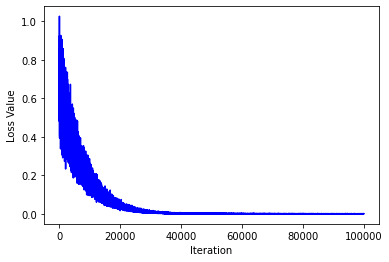

In [ ]:
nn = NeuralNetwork()
nn.add(FullyConnectedLayer(2,50))
nn.add(ReLU())
nn.add(FullyConnectedLayer(50,1))

def sample_batch(batch_size):
    x = np.random.randn(2, batch_size)
    y = np.expand_dims(np.abs(x[0, :]) - np.abs(x[1, :]), axis=0)
    return x, y

loss_values = []

for iter in range(100001):
    input_data, target = sample_batch(100)
    
    output = nn.forwards(input_data)
    loss, grad_loss = euclidean_loss(output, target)
    nn.backwards(grad_loss)
    nn.update_param(step_size=0.0001)
    
    if iter % 10000 == 0:
        print(f"Iter{iter} Loss={loss}")
    
    loss_values.append(loss)

plt.clf()
plt.plot(loss_values, color='blue')
plt.ylabel('Loss Value')
plt.xlabel('Iteration')
plt.show()

***Short Answer Question: The above neural network uses a two-layer network. For the above sample_batch() function, will it work with a single layer? Why or why not?***

Your Answer: No, because a single layer could not work with a nonlinear function, and in this case I think |x0| - |x1| is not a linear function






***Short Answer Question: The loss curve usually goes down each iteration, but it is not guaranteed to go down. Give two reasons why.***

Your Answer: 1. There might not be sufficient training data which causes the model not able to predict well on new test data, or the training data itself involves uncleaned data like outliers. 2. The learning rate might not be high enough to make the loss to change drastically 

Large Neural Networks
---------------------

The neural network we have implemented above is fairly simple, but it illustrates the core concepts. The most advanced neural networks today are heavily engineered to efficiently work on GPUs and carefully tuned to train in a reasonable amount of time.

Before you continue, we need to do two things: attach a GPU to the Google Colab, and install some packages:

- To attach a GPU, click on the **Runtime** menu, then **Change runtime type**, and select **GPU** as a hardware accelerator. The notebook will automatically attach to the new runtime.

- We also need to install a few packages. Run the code below to automatically install them.

In [ ]:
!pip --quiet install ftfy regex tqdm
!pip --quiet install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Let's load some libraries. This will load PyTorch, which is a state-of-the-art library for deep learning. PyTorch is a very advanced version of the above simple neural network library that we built. We will also import `clip` which is a very large neural network built in PyTorch for natural images. Finally, we will also detect if there is GPU / CUDA support on your machine, and use it if possible. But if you don't have a GPU, this code will still work for you, and may just be a bit slower.

In [ ]:
import torch
import clip
from PIL import Image
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f'Using device: {device}')

Using device: cuda


If you have successfully attached a GPU to this runtime, it should output `Using device: cuda` above. If it says CPU instead, the code is not running on a GPU.

Now, let's load an image for us to operate on.

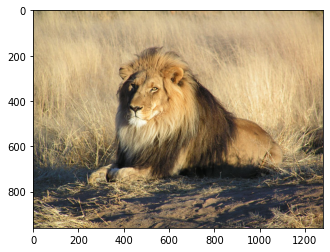

In [ ]:
!wget -qN https://www.cs.columbia.edu/~vondrick/class/coms4732/hw2/Lion.jpg
im = Image.open("Lion.jpg")
plt.imshow(im)
plt.show()

Let's load the already trained neural network, and print the neural network architecture. As you will see, this neural network will be huge consisting of hundreds of layers and different operations. However, the principles are the same as the toy neural network above. Each layer consists of a forwards() function, a backwards() function, and as backwards_param() if there are learnable parameters. They are all chained together with back-propagation.

In [ ]:
model, preprocess = clip.load("ViT-B/32", device=device)
print(model)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 134MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

This neural network is able to associate images with natural language text. This is called a **multi-modal** method, which is a topic that we will cover in the later lectures in the course. However, for now, it is simple enough to use directly. Let's define a few categorical labels, and see which one the neural network picks for this image. (You can read more about this network [here](https://openai.com/blog/clip/)).

In [ ]:
def classify(im, labels):
    image = preprocess(im).unsqueeze(0).to(device)
    text = clip.tokenize(labels).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)
        
        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    for i, label in enumerate(labels):
        print(f"{labels[i]} = {probs[0,i]*100}%")

labels = ["a truck", "a dog", "a cat", "a lion"]

classify(im, labels)

a truck = 0.0012993812561035156%
a dog = 0.006806850433349609%
a cat = 0.08831024169921875%
a lion = 99.90234375%


On our machine, this neural network is very confident that the image is a lion. Its second choice would be a cat, which makes sense!

Problem 4: Say Cheese
----------

Let's experiment with the neural network a bit more. Can you find interesting cases where it works? and interesting cases where it does not?

Use the below code to take picture with your webcam.

In [ ]:
#@title Take a webcam picture {display-mode: "form"}

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

This is the interesting case where it does not work. I smiled. You can tell from my mouth curvature, but because I turn my face around. It does not clasiffy it correctly.

<IPython.core.display.Javascript object>

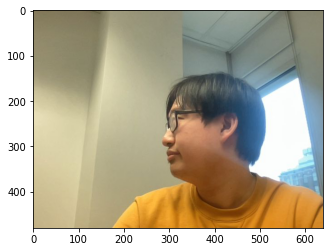

a person smiling = 16.455078125%
a person frowning = 83.544921875%


In [ ]:
take_photo('photo.jpg')

im = Image.open('photo.jpg')
plt.imshow(im)
plt.show()

labels = ["a person smiling", "a person frowning"]

classify(im, labels)

This is the interesting case where it works. I frown and smile at the same time, and it gives a 50-50 probability result. 

<IPython.core.display.Javascript object>

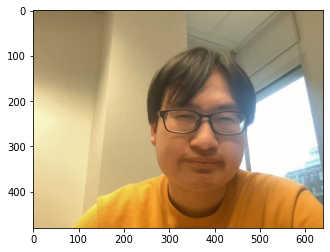

a person smiling = 50.0%
a person frowning = 50.0%


In [ ]:
take_photo('photo.jpg')

im = Image.open('photo.jpg')
plt.imshow(im)
plt.show()

labels = ["a person smiling", "a person frowning"]

classify(im, labels)

**Short Answer: Neural networks still have many failure modes. Experiment with different pictures from your webcam and different labels. What types of failures do you see?**

Your Answer: There is an interesting case where it does not work. For example, if the user is not directly facing the webcam, the classification can be quite inaccurate. For instance, in my picture where I turned my face to the left, you can tell from the curvature of my mouth that i'm actually smiling, but because I look not directly into the camera. It classfies a 85% frowning probability. I think the algorithm is somewhat depending on searching specific positions on my face. 

In [4]:
%%capture
from google.colab import drive
drive.mount('/content/drive');
!sudo apt-get update;
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic;
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab\ Notebooks/Homework2\ Clarence\ Jiang.ipynb;
